In [1]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#Ejemplo de smote con cv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
#Random forest grid search
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import lightgbm as lgb
import warnings
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
warnings.catch_warnings()

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/final_dataframe.csv')
df=df.drop('Unnamed: 0',axis=1)

In [3]:
from ydata_profiling import ProfileReport  
profile = ProfileReport(df, title="Profiling Report") 
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
from sklearn.decomposition import PCA

# Separar las características y la variable objetivo
X = df.drop('readmitted', axis=1)
y = df['readmitted']
pca = PCA(n_components=7)  # Puedes cambiar None por el número de componentes
X = pca.fit_transform(X)


## SPLIT

In [5]:
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        df[i]=df[i].astype(int)

In [6]:
X.shape

(57176, 7)

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

# Cargar tus datos
# data = tu_dataframe


# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Sobremuestreo de la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Calcular la nueva distribución de clases después del sobremuestreo
class_distribution = Counter(y_train_resampled)
major_class = max(class_distribution, key=class_distribution.get)
reduced_major_class_count = int(class_distribution[major_class] * 0.75)

# Crear un diccionario para la estrategia de submuestreo
sampling_strategy = {major_class: reduced_major_class_count}

# Submuestreo de la clase mayoritaria
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_resampled, y_train_resampled)

print(f"Distribución de clases después del submuestreo: {Counter(y_train_balanced)}")


Distribución de clases después del submuestreo: Counter({0: 26948, 1: 20211})


In [8]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Inicializa el espacio de parámetros para la primera iteración
param_grid = {
    'num_leaves': [10, 50, 100],
    'max_depth': [5, 15, 30],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [200]
}

# Realiza un número determinado de iteraciones
n_iterations = 1

for iteration in range(0, n_iterations ):
    print(f"Iteración {iteration}/{n_iterations}")

    # Configura y ejecuta la búsqueda en cuadrícula
    model = LGBMClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Muestra los mejores parámetros encontrados en esta iteración
    best_params = grid_search.best_params_
    print("Mejores parámetros: ", best_params)

    # Ajusta el espacio de parámetros para la siguiente iteración
# Ajusta el espacio de parámetros para la siguiente iteración
    adjust_factor = 2 + iteration
    param_grid = {
        'num_leaves': [max(best_params['num_leaves'] - int(best_params['num_leaves'] / adjust_factor), 1), 
                    best_params['num_leaves'], 
                    best_params['num_leaves'] + int(best_params['num_leaves'] / adjust_factor)],
        'max_depth': [max(best_params['max_depth'] - int(best_params['max_depth'] / adjust_factor), 1), 
                    best_params['max_depth'], 
                    best_params['max_depth'] + int(best_params['max_depth'] / adjust_factor)],
        'learning_rate': [max(best_params['learning_rate'] - best_params['learning_rate'] / adjust_factor, 0.01), 
                        best_params['learning_rate'], 
                        best_params['learning_rate'] + best_params['learning_rate'] / adjust_factor],
        'n_estimators': [200]  # Este parámetro se mantiene constante en 200 como en tu solicitud
    }


# Evaluar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión final en el conjunto de prueba: ", accuracy)



Iteración 0/1


[LightGBM] [Info] Number of positive: 18792, number of negative: 26948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 45740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410844 -> initscore=-0.360478
[LightGBM] [Info] Start training from score -0.360478
Mejores parámetros:  {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 50}
Precisión final en el conjunto de prueba:  0.6103532703742567


In [14]:
# Evaluar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión final en el conjunto de prueba: ", accuracy)







Precisión final en el conjunto de prueba:  0.6103532703742567


In [10]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from itertools import combinations
import numpy as np

y_pred = best_model.predict_proba(X_test)

# Cantidad de clases
n_classes = y_pred.shape[1]

# Calcular AUC para cada par de clases
aucs = []
for i, j in combinations(range(n_classes), 2):
    # Filtrar las observaciones para las clases i y j
    relevant_indices = np.where((y_test == i) | (y_test == j))[0]  # Extraer el array de índices
    relevant_test = y_test.iloc[relevant_indices] if isinstance(y_test, pd.Series) else y_test[relevant_indices]
    relevant_prob = y_pred[relevant_indices, :][:, [i, j]]

    # Crear etiquetas binarias para este par de clases
    binary_test = np.where(relevant_test == i, 1, 0)
    
    # Calcular AUC para este par de clases
    auc_ij = roc_auc_score(binary_test, relevant_prob[:, 1])  # Utilizar solo las probabilidades de la segunda clase en el par
    aucs.append(auc_ij)

# Calcular el promedio de los AUCs
mean_auc_ovo = np.mean(aucs)
mean_auc_ovo


0.3907997327699617

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      9344
           1       0.25      0.56      0.34      2092

    accuracy                           0.61     11436
   macro avg       0.56      0.59      0.53     11436
weighted avg       0.75      0.61      0.65     11436



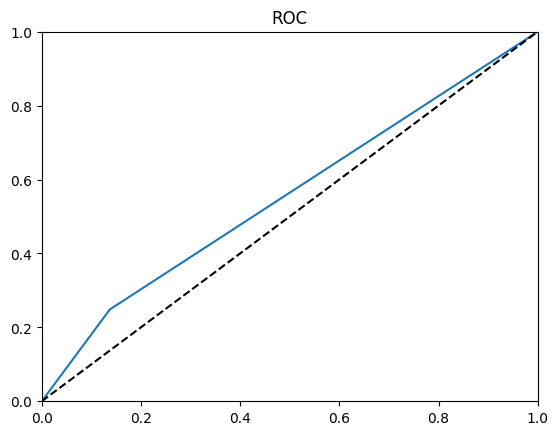

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [16]:
roc = roc_curve(y_test, y_pred, pos_label=1)
sns.lineplot(x=roc[0], y=roc[1])
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC")
plt.show()

imp_df = pd.DataFrame(data=best_model.feature_importances_, columns=['Feature Importance'],
                      index=X.columns)

imp_df.sort_values("Feature Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(y='index', x='Feature Importance', data=imp_df.reset_index())
plt.title("Feature Importance")
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv1D
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test=to_categorical(y_test)
auc=tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False
)


model = Sequential()
model.add(Dense(256, activation ='relu', input_dim = 10))
model.add(Dense(128, activation ='relu'))
model.add(Dropout(.5))
model.add(Dense(86, activation ='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(.25))
model.add(Dense(32, activation ='relu'))
model.add(Dropout(.1))
model.add(Dense(16, activation ='relu'))
model.add(Dense(3, activation ='softmax'))



model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy",tf.keras.metrics.AUC()])

model.fit(X_train,
          y_train,
          verbose = 1,
          epochs =100,
          batch_size = 512,
          validation_data = (X_test, y_test))

NameError: name 'y_train' is not defined